## Среда POGEMA (Partially Observable Grid Environments for Multiple Agents)

Среда представляет собой клеточное поле с расположенными на нём агентами, их целями и препятствиями. Каждому агенту необходимо добраться до своей цели, избегая препятствий и других агентов. Пример среды, показывающей частичную наблюдаемость для одного агента:

<div>
    <img src="https://raw.githubusercontent.com/Tviskaron/pogema-pics/main/pics/pogema-obs.svg" width="600"/>
</div>

* Наблюдение представляет собой 3 матрицы. Кажда матрица центрирована относительно позиции агента. В качестве наблюдения для всех задач будет использован $R=5$ (поле 11x11 вокруг агента).
* Пространство действий: Агенту доступно 5 действий, движения в 4-ре возможные стороны и пропуск хода.
* Функция вознаграждения: Базовая функция вознаграждения -- это ``0.0`` для всех состояния, пока агент не дошел до цели и ``1.0``, когда дошёл.


## Установка

In [1]:
!pip install -q --quiet pogema

## Пример создания среды

Изменить параметры среды можно передав конфигурационный файл. Параметры, который могут быть вам полезны: 
* size – отвечает за размер окружения
* num_agents – количество агентов в среде
* density - плотность препятствий (рекомендуется использовать значения от 0.2 до 0.4, на них же будет проверяться и ваше решение)
* seed – фиксированное расположения препятствий, агентов и целей. По умолчанию выбирается случайно. Можно поставить None, для случайного выбора. Может быть полезно для проверки результатов.

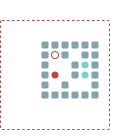

In [3]:
import gym
from pogema.wrappers.multi_time_limit import MultiTimeLimit
from pogema.animation import AnimationMonitor
from IPython.display import SVG, display
import numpy as np
import pogema
from pogema import GridConfig

# Define random configuration
grid_config = GridConfig(num_agents=3, # количество агентов на карте
                         size=4,      # размеры карты
                         density=0.4,  # плотность препятствий
                         seed=1,       # сид генерации задания 
                         max_episode_steps=256,  # максимальная длина эпизода
                         obs_radius=5, # радиус обзора
                        )

env = gym.make("Pogema-v0", grid_config=grid_config)
env = AnimationMonitor(env)

# обновляем окружение
obs = env.reset()

done = [False, ...]

while not all(done):
    # Используем случайную стратегию
    obs, reward, done, info = env.step([np.random.randint(4) for _ in range(len(obs))])
# сохраняем анимацию и рисуем ее
env.save_animation("render.svg", egocentric_idx=1)
display(SVG('render.svg'))

In [37]:
# 0 - на месте
# 1 - вверх
# 2 - вниз
# 3 - влево
# 4 - вправо

## Пространство наблюдений и действий

In [4]:
grid_config = GridConfig(num_agents=2, # количество агентов на карте
                         size=8,      # размеры карты
                         density=0.3,  # плотность препятствий
                         seed=1,       # сид генерации задания 
                         max_episode_steps=256,  # максимальная длина эпизода
                         obs_radius=5, # радиус обзора
                        )

env = gym.make("Pogema-v0", grid_config=grid_config)

obs = env.reset()
print('Observation shape:', obs[0].shape)
print('Action space:', env.action_space)

Observation shape: (3, 11, 11)
Action space: Discrete(5)


In [5]:
# напечатаем наблюдение для одного агента
obs[1]

array([[[0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1.],
        [0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0

Доступ к состоянию среды можно получить используя поле ``grid``:

In [6]:

grid = env.grid

print(grid.obstacles) # препятствия
print(grid.positions_xy) # положения агентов
print(grid.finishes_xy) # цели агентов

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

Т.к. среда является многоагентной по умолчанию – она принимает список действий агентов и выдает список наблюдений. 

## Регистрация в системе codabench и отправка решений

Вам нужно зарегистрировать свою команду (название – имя команды в discord!) на [платформе проверки решений](http://46.243.226.64/competitions/1/).



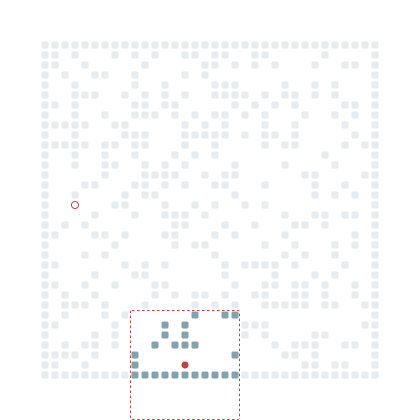

In [7]:
import gym
from pogema.wrappers.multi_time_limit import MultiTimeLimit
from pogema.animation import AnimationMonitor
from IPython.display import SVG, display
import numpy as np
import pogema
from pogema import GridConfig

# Define random configuration
grid_config = GridConfig(num_agents=1, # количество агентов на карте
                         size=32,      # размеры карты
                         density=0.3,  # плотность препятствий
                         seed=4,       # сид генерации задания 
                         max_episode_steps=256,  # максимальная длина эпизода
                         obs_radius=5, # радиус обзора
                        )

env = gym.make("Pogema-v0", grid_config=grid_config)
env = AnimationMonitor(env)

# обновляем окружение
obs = env.reset()

done = [False, ...]


# сохраняем анимацию и рисуем ее
env.save_animation("render.svg", egocentric_idx=0)
display(SVG('render.svg'))

In [8]:
obs[0][2]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])


## Интерфейс тестирования и пример случайного решения 

Вам нужно реализовать класс ```Model```, основной метод взаимодействия – ```act```. Он передает наблюдения, флаги окончания эпизода и относительные позиции положений и целей агентов (последнее может быть полезно для планировочного решения). Во время подготовки решения вы можете пользоваться полной информацией о среде, но во время тестирования ваш агент должен действовать только по информации передающейся в метод ```act```.

In [9]:
import numpy as np


class Model:
    def __init__(self):
        """
        This should handle the logic of your model initialization like loading weights, setting constants, etc.
        """
        pass

    def act(self, obs, dones, positions_xy, targets_xy) -> list:
        """
        Given current observations, Done flags, agents' current positions and their targets, produce actions for agents.
        """
        return [np.random.randint(5) for _ in range(len(obs))]

## Получение полной информации

К этой информации не будет доступа во время тестирования!

In [10]:
env = gym.make('Pogema-v0', grid_config=GridConfig(num_agents=2))
obs = env.reset()

print(env.get_obstacles())

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [11]:
print(env.get_targets_xy())

[(9, 11), (5, 8)]


In [12]:
print(env.get_agents_xy())

[(9, 8), (5, 9)]


## Конфигурации для тестирования

```
obs_radius=5,
max_episode_steps=256,
density – [0.2, 0.4],
num_agents – ?,
size – ? (<= 64),
seed – ?
```

## Бейслайны 

<здесь сегодня появятся ссылка>